## Counting tweets mentioning #labflags

There are a few #labflags tweets out now and I wonder whether that correlates with the number of people living in these countries, let's check!

In [ ]:
from twython import Twython
import configparser
config = configparser.ConfigParser()

config.read('config.ini')

APP_KEY = config['DEFAULT']['APP_KEY']
APP_SECRET = config['DEFAULT']['APP_SECRET']

twitter = Twython(APP_KEY, APP_SECRET, oauth_version=2)
ACCESS_TOKEN = twitter.obtain_access_token()

twitter = Twython(APP_KEY, access_token=ACCESS_TOKEN)

In [92]:
from emoji import UNICODE_EMOJI
import emoji
import regex
from collections import defaultdict
# query latest tweets for labflags, ask for something big to return
results = twitter.search(q='#labflags', result_type='latest', count=2000)

emoji_dict = defaultdict(int)
for r in results['statuses']:
    # retweets are returned as normal texts!
    if 'RT' in r['text']: continue
    for t in regex.findall(r'\X',r['text']):
        if t in UNICODE_EMOJI:
            emoji_dict[t] += 1

print(emoji_dict)
text_dict = {}
for k in emoji_dict:
    text_dict[emoji.demojize(k).replace(':','').replace('flag_for_','')] = emoji_dict[k]    

defaultdict(<class 'int'>, {'🇵🇰': 2, '🇵🇹': 3, '🇮🇳': 9, '🇳🇱': 3, '🇯🇵': 3, '🇵🇱': 2, '🇨🇳': 9, '🇳🇬': 1, '🇲🇺': 1, '🇳🇵': 2, '🇵🇪': 1, '🇮🇹': 3, '🇪🇬': 2, '🇲🇽': 5, '🇨🇺': 1, '🇦🇷': 1, '🇭🇺': 1, '🇨🇱': 2, '🇭🇰': 1, '🇨🇭': 3, '🇫🇮': 1, '🇸🇪': 2, '🇪🇨': 1, '🇭🇷': 3, '🇹🇼': 2, '🇹🇷': 1, '🇰🇬': 1, '🇪🇺': 6, '🇩🇪': 8, '🇮🇷': 6, '🇮🇩': 1, '🇦🇹': 1, '🇦🇺': 2, '🇿🇦': 1, '🇨🇦': 6, '🇪🇸': 3, '🇧🇷': 4, '🇰🇿': 1, '🇺🇦': 2, '🇩🇰': 1, '🇺🇸': 8, '🇲🇴': 1, '🇸🇾': 1, '🇷🇺': 1, '🇲🇾': 2, '🇮🇸': 1, '🇰🇷': 2, '🇫🇷': 4, '🇬🇧': 6, '🇨🇴': 1, '🌈': 1, '🇬🇷': 1})


Populating the interactive namespace from numpy and matplotlib


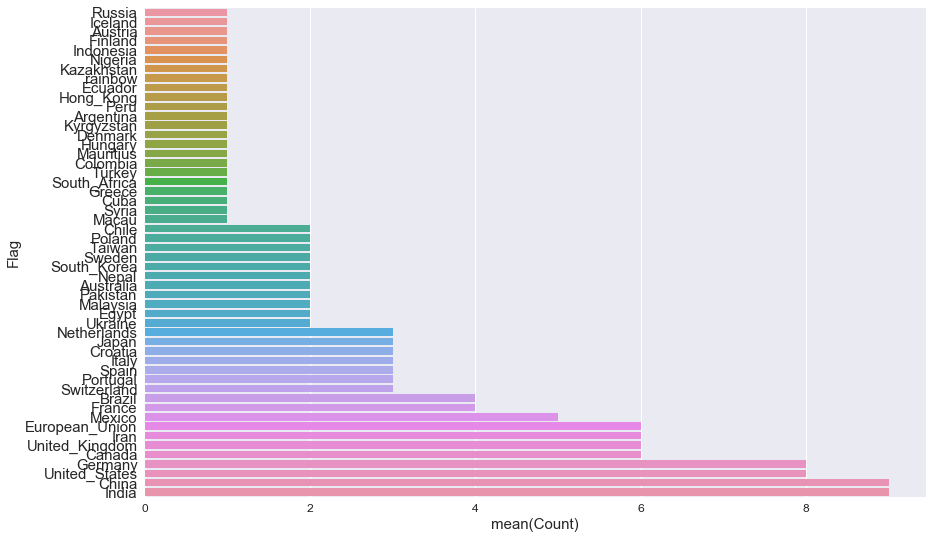

In [129]:
import pandas as pd
df = pd.DataFrame.from_dict(text_dict, orient='index')
df.reset_index(level=0, inplace=True)
df.columns=['Flag', 'Count']
df.sort_values('Count', inplace=True)


import seaborn as sns
%pylab inline
rcParams["figure.figsize"] = [14, 9]
rcParams["axes.labelsize"] = 15.0
rcParams["axes.titlesize"] = 15.0
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 15
rcParams['font.size'] = 10

ax = sns.barplot(x="Count", y="Flag", data=df)

Let's normalise that by the number of people living in those countries!

In [124]:
import requests
import json

normalised_countries = {}
for country in  text_dict.keys():
    my_response = requests.get('http://api.population.io:80/1.0/population/%s/2017-01-01/'%(country))
    if my_response.ok:
        json_data = json.loads(my_response.text)

        try:
            population = json_data['total_population']['population']
        except KeyError:
            continue
        million_population = population / 1000000
    normalised_countries[country] = text_dict[country]/million_population
print(normalised_countries)

{'Australia': 0.08205024863891971, 'Malaysia': 0.0638344940093402, 'European_Union': 0.3617100057548062, 'Mexico': 0.03926926217588044, 'Greece': 0.08996243258777567, 'China': 0.006371931759541944, 'France': 0.06108859572132422, 'South_Africa': 0.015272148930331055, 'Netherlands': 0.045816446790993164, 'Mauritius': 0.7939482091704194, 'Denmark': 0.17559561593937598, 'Italy': 0.048986405945774004, 'Syria': 0.17559561593937598, 'Argentina': 0.023434690400321225, 'India': 0.006899952612965441, 'Ukraine': 0.04524123201737372, 'Hong_Kong': 0.02262061600868686, 'Ecuador': 0.06028500095913437, 'Croatia': 0.7087962560436694, 'rainbow': 0.06028500095913437, 'United_States': 0.48228000767307494, 'Nigeria': 0.005229064012078636, 'Iran': 0.03137438407247182, 'Indonesia': 0.003846654562219245, 'Finland': 0.18227911599003443, 'Russia': 0.18227911599003443, 'Iceland': 2.9230364502645347, 'Peru': 0.03150080051409306, 'Pakistan': 0.010378193729555542, 'Egypt': 0.35119123187875195, 'Macau': 0.0163288019

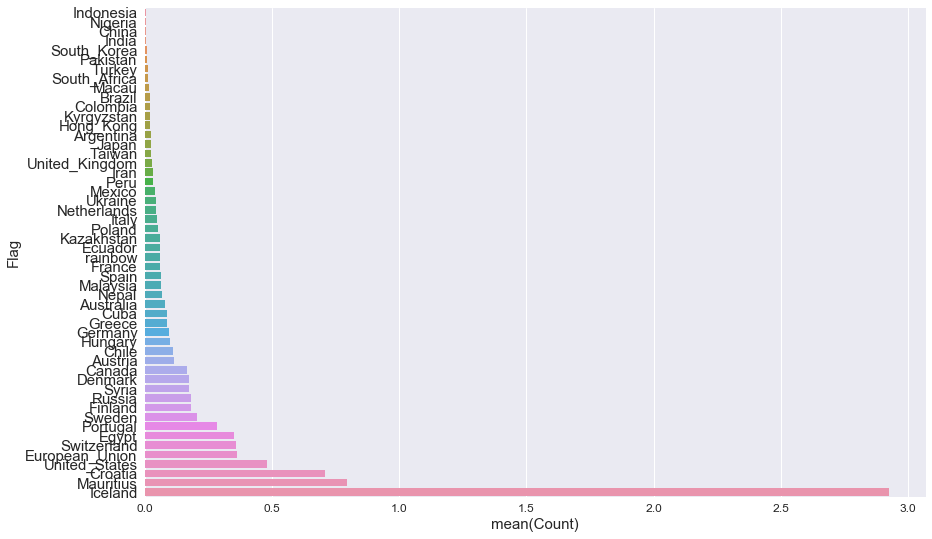

In [128]:
df = pd.DataFrame.from_dict(normalised_countries, orient='index')
df.reset_index(level=0, inplace=True)
df.columns=['Flag', 'Count']
df.sort_values('Count', inplace=True)
ax = sns.barplot(x="Count", y="Flag", data=df)

Iceland and Mauritius come on top - I think there's only one tweet mentioning Mauritius (mine), but I'm surprised about Iceland. The other countries (US,EU,Switzerland) make more sense! Does this correlate with number of publications per country?